### ASTR 8070: Astrostatistics
***S. R. Taylor***
___

# Homework 9
### Due: Monday, Apr 15th at 11.59pm CDT
---

The first homework problem this week is very subjective, and necessarily deal with some randomization in your solutions. Do your best to fully catalog your tests, checks, and thought process as you answer. 

## Problem 1


Go to the TensorFlow playground [here](https://playground.tensorflow.org/#activation=linear&regularization=L2&batchSize=10&dataset=xor&regDataset=reg-plane&learningRate=0.01&regularizationRate=0&noise=35&networkShape=1&seed=0.50246&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false). You will play with the tensorflow neural network architecture there, and come back to answer the questions here.


1. The model as given combines two input features into a single neuron with a linear activation of form $f(x) = x$. Write down an equation that algebraically describes the output of this network, in terms of the synapse weights, the neuron bias, and the input data. Based on your equation, will this model learn any nonlinearities? Run the network to confirm your guess.

We can call the two input features $x_{1}$ and $x_{2}$. Our two synapses connecting these features to a singular neuron give

$$ z_{1} =  w_{1} x_{1} $$

and 

$$ z_{2} =  w_{2} x_{2} $$

These are summed and added to a bias in the neuron. Here, since our activation function is linear, the neuron gives

$$ a = f(z) = z $$
$$ = \Sigma_{i=1}^{2} w_{i} x_{i} + b_{1} $$
$$ = w_{1} x_{1} + w_{2} x_{2} + b_{1}. $$

This neuron is connected with a synapse, which adds another weight, to the output layer, which adds another bias, giving us

$$ \text{output} = w_{3} (w_{1} x_{1} + w_{2} x_{2} + b_{1}) + b_{2}. $$


This model cannot learn any nonlinearities because each feature (x) is treated linearly in this equation (no degrees higher than 1). 

On the website, when I hover over the one neuron, the classification is linear: 

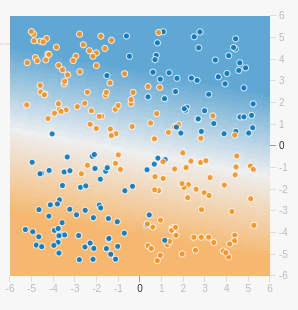

2. Try increasing the number of neurons in the hidden layer from 1 to 2, and also try changing from a Linear activation to a nonlinear activation like ReLU. Can you create a model that can learn nonlinearities? Can it model the data effectively? Check through multiple re-runs. *Note that you can hover over the neurons to see which features they are identifying.*

This model was able to learn some nonlinearities, see screenshots below, but they are not doing well at modelling the data.

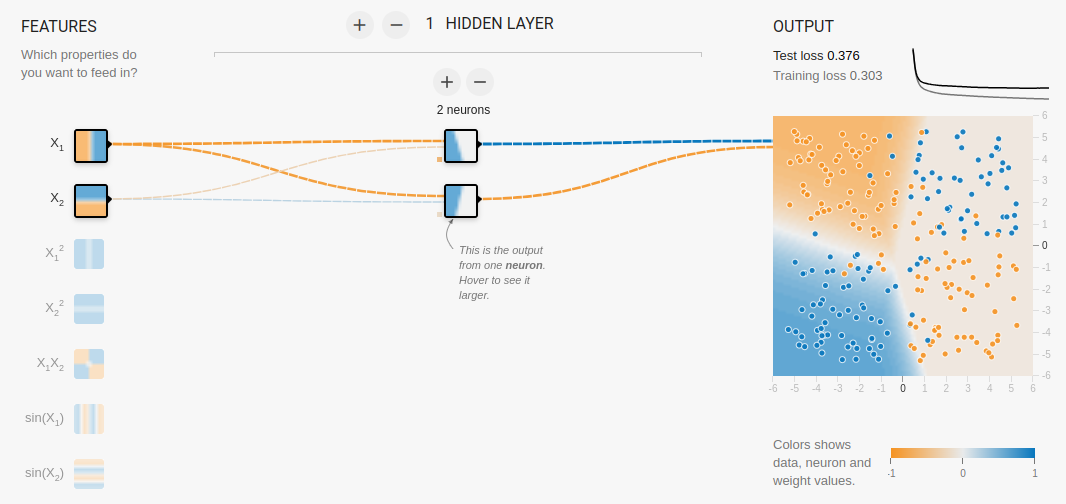
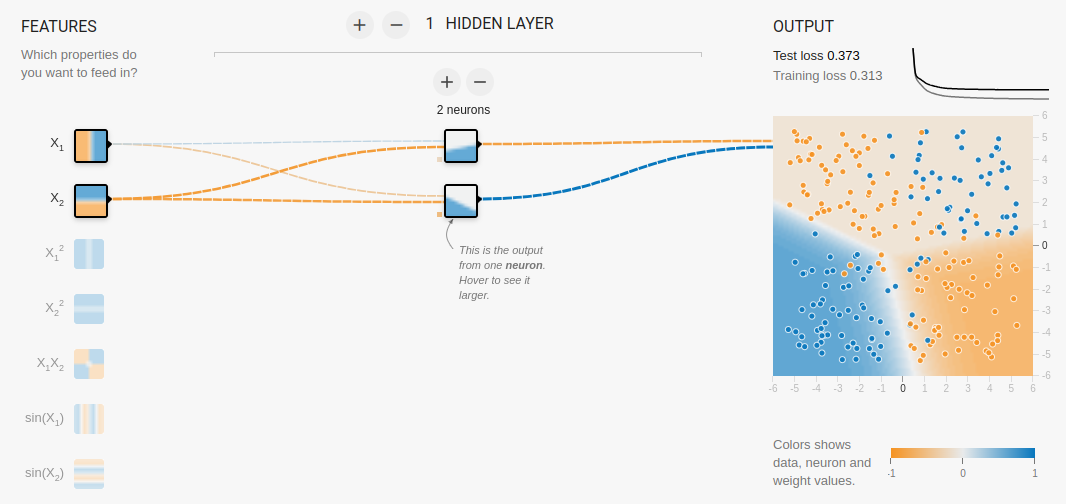
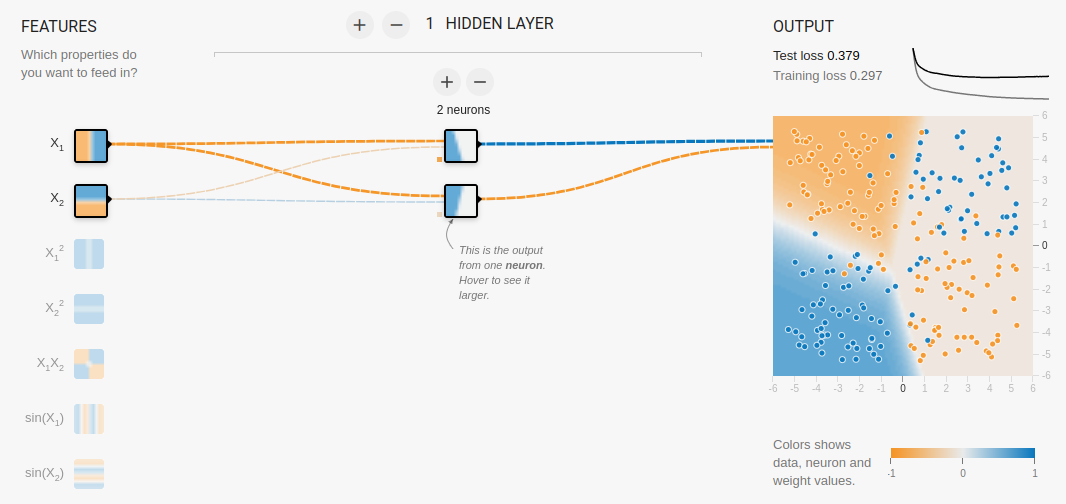

3. Try increasing the number of neurons in the hidden layer from 2 to 3, using a nonlinear activation like ReLU. Can it model the data effectively? How does model quality vary from run to run?

This is doing better at modelling the data. In general, the test losses are lower than the previous model. The losses don't vary too much between the runs, but they do correspond to when the quality of the classification visually is worse, like in the second screenshot below. Ideally, the model wouldn't have any runs that are bad.

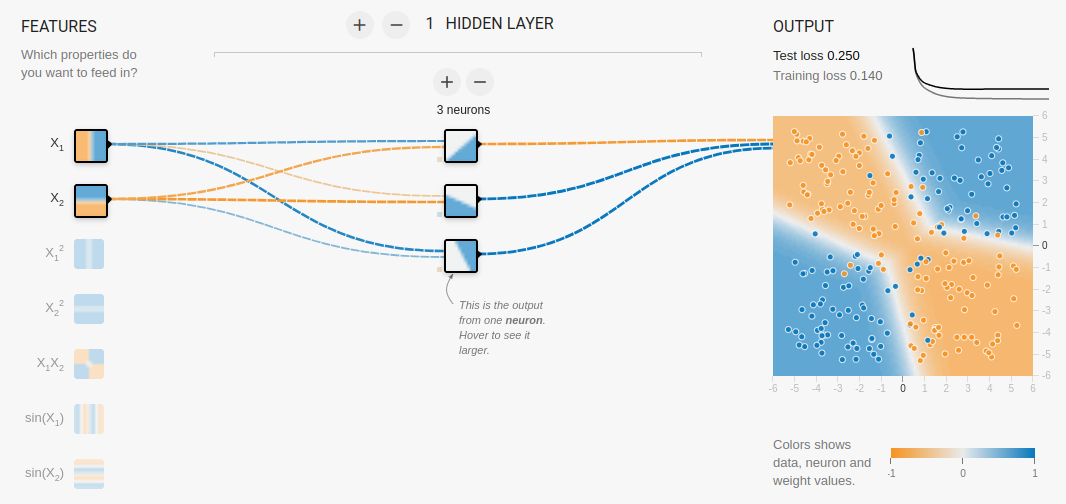
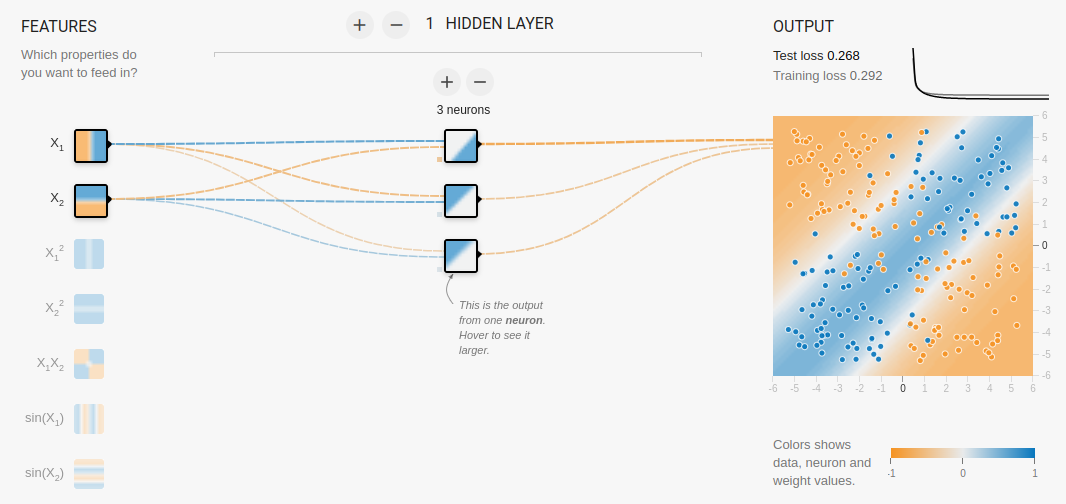
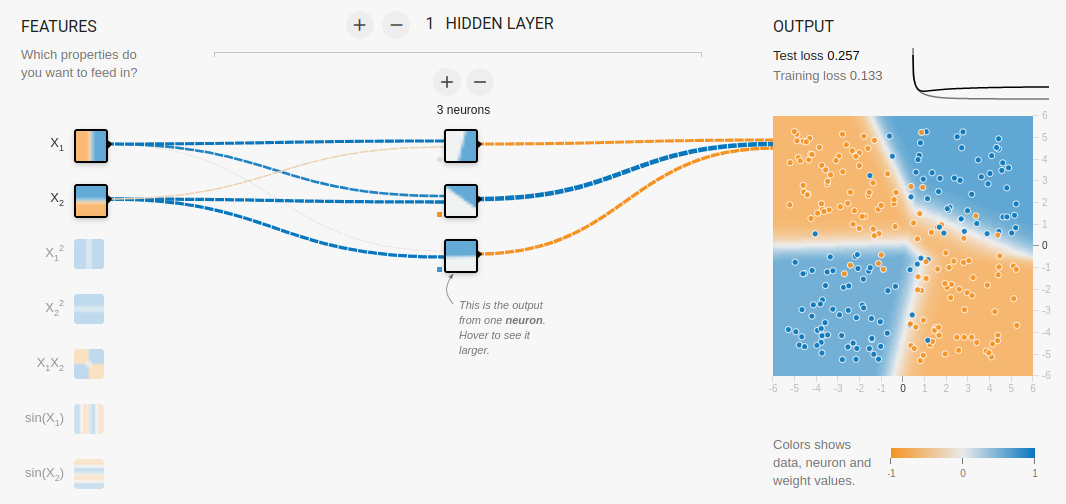
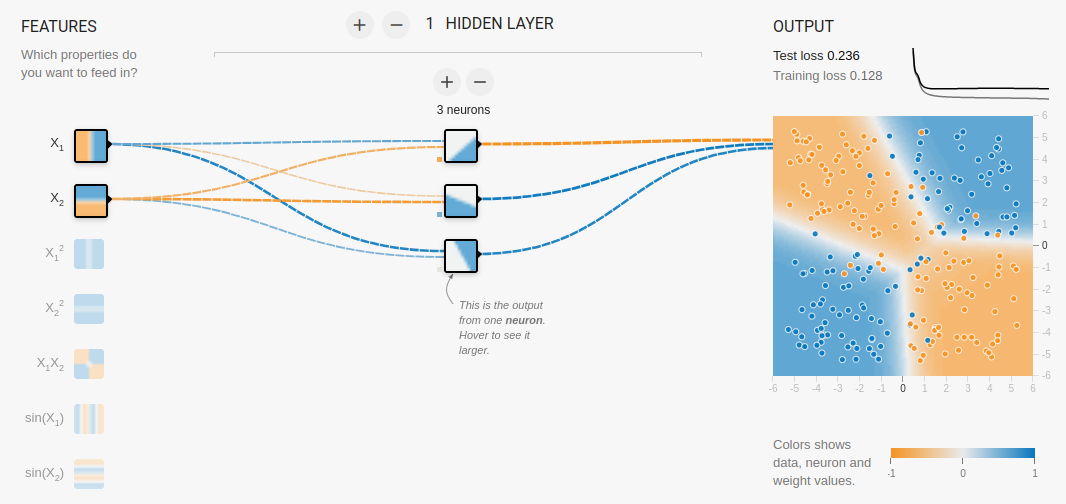

4. Continue experimenting by adding or removing hidden layers and neurons per layer. Also feel free to change learning rates, regularization, and other learning settings. What is the smallest number of neurons and layers you can use that gives test loss of 0.177 or lower?

For this given arrangement of the data (quarters), I found that I could use one layer and four neurons with a 50-50 train-test split to get as low as ~1.8 test loss, but if I allow much more data to be in the train set (90%) then my test losses get much lower. Giving it more training data also allowed for low test losses with the Sigmoid activation function, which wasn't doing well compared to ReLU when the split was 50-50.

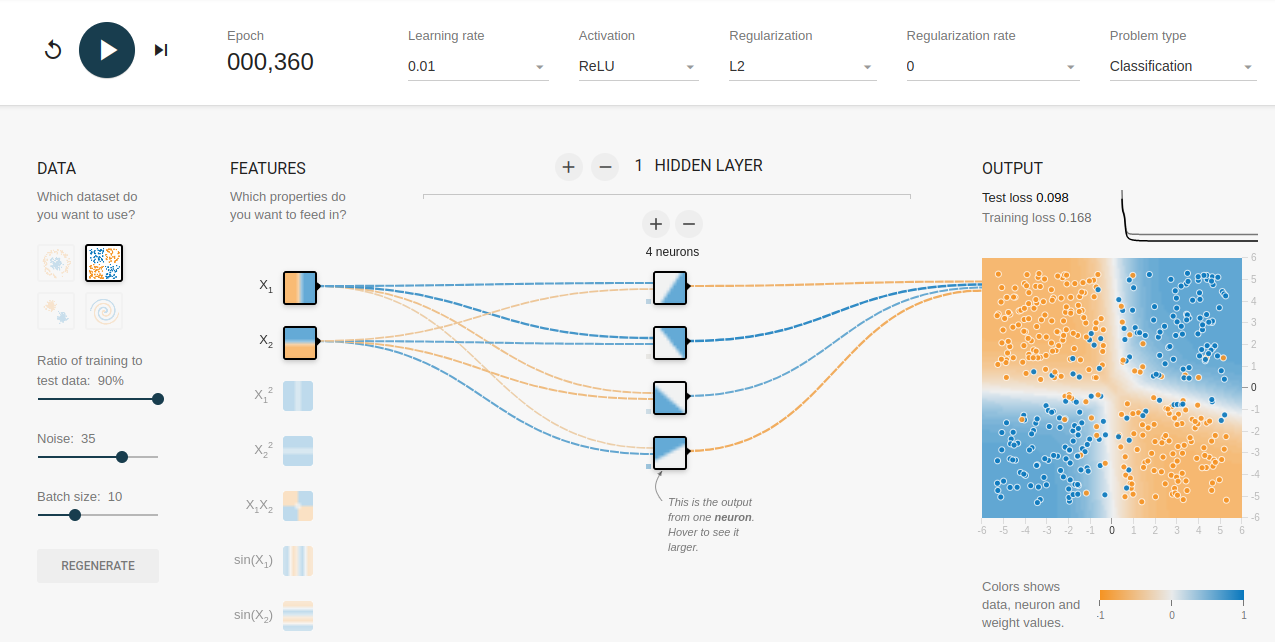
![Screenshot from 2024-04-12 16-01-28.png](<attachment:Screenshot from 2024-04-12 16-01-28.png>)
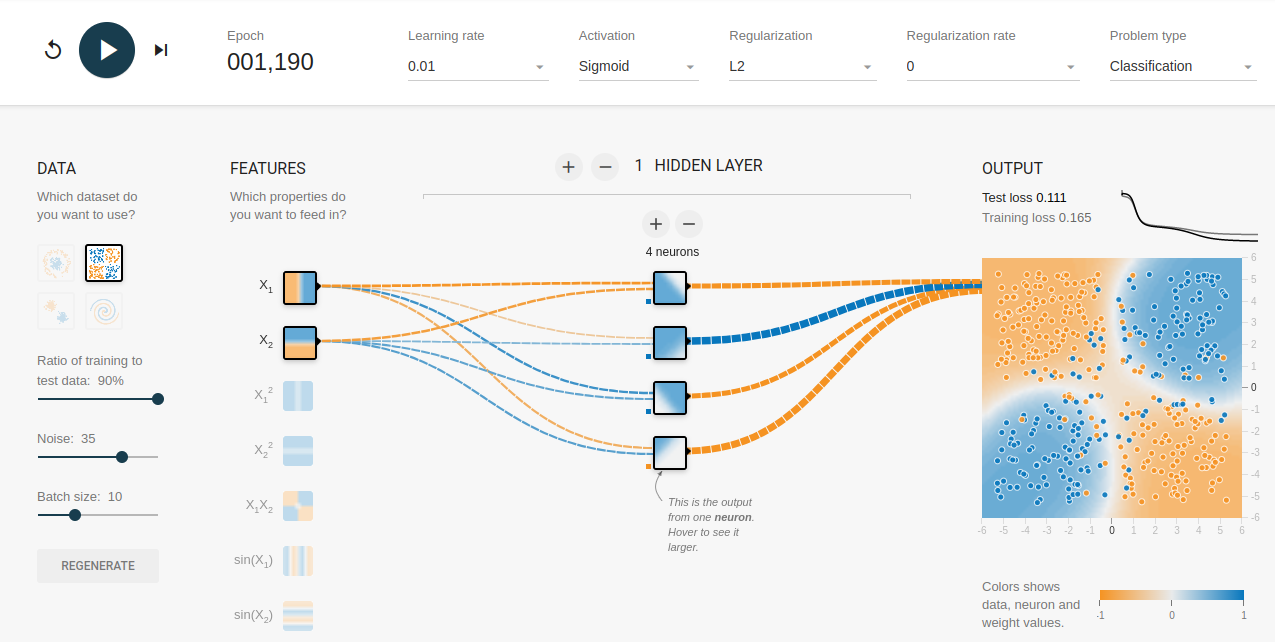

5. Does increasing the model size improve the fit, or how quickly it converges? Does this change how often it converges to a good model? For example, try the following architecture:

- First hidden layer with 3 neurons.
- Second hidden layer with 3 neurons.
- Third hidden layer with 2 neurons.

This configuration was interesting, as it first started slowly converging then had a moment where it kicked in and the test loss saw a large drop. I would still say though, in this trial and in some of my playing around with multiple fully connected layers, that the model performing the best is the one with one layer and four neurons. This might mean that more layers and neurons might be overfitting rather than being the best fit for the data.

The first screenshot is this architecture applied on a 50-50 split and the second is on a 90-10 split. The 90-10 split converged must faster, which makes sense, but I think the biggest factor in convergence time is actually the learning rate. The lower learning rates 

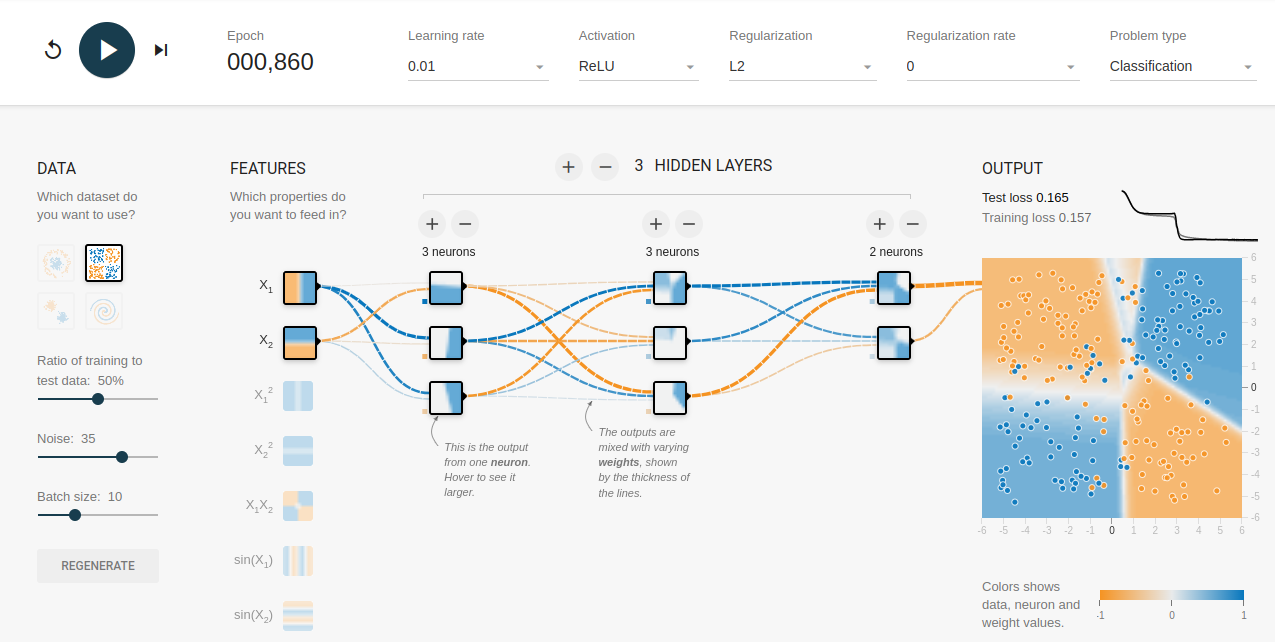
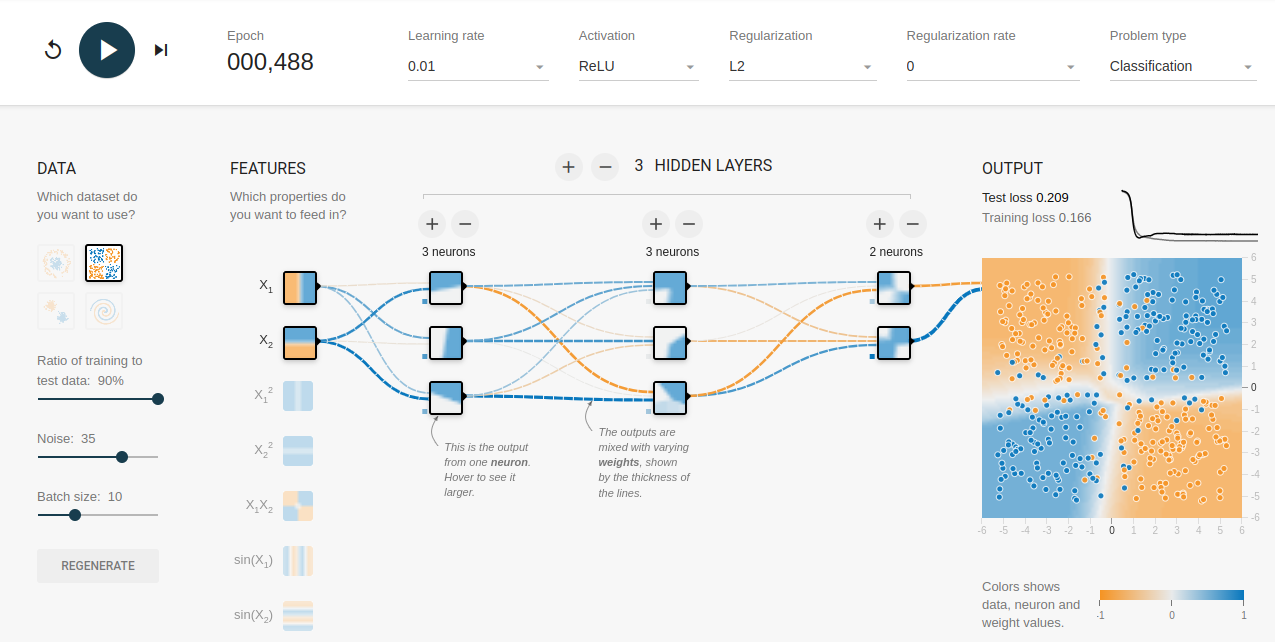

## Problem 2

The first few steps of this problem are the same as last week's homework.


1. Read in the same galaxy color data as used in Homework 8. Slice the data array to only take every other 10th row. From this reduced data volume, create arrays of $(u-g)$, $(g-r)$, $(r-i)$, and $(i-z)$ colors. Also create arrays of redshift and the spectral class. 

In [1]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format='retina'

In [3]:
data = np.load('/home/rothj1/Desktop/AstroStats/repos/astr_8070_s24/coursework/homeworks/hw_data/hw8_data_1.npy')

# create arrays
ug = data['u'] - data['g']
gr = data['g'] - data['r']
ri = data['r'] - data['i']
iz = data['i'] - data['z']
redshift = data['redshift']
specClass = data['specClass']

2. We're going to make classification pretty tough for our deep neural network. Make a scatter plot of $(r-i)$ versus $(i-z)$, color coding by galaxy or quasar class. Notice how much more difficult the visual discrimination is compared to $(u-g)$ versus $(g-r)$. The plot should include appropriate axis labels and a legend.

In [4]:
# get number of galaxies and quasars 
quasar_idxs = np.where(specClass=='QSO')
gal_idxs = np.where(specClass=='GALAXY')

quasars = specClass[quasar_idxs]
galaxies = specClass[gal_idxs]

print(len(quasars),'quasars')
print(len(galaxies),'galaxies')

# check if any other types that were missed
if len(specClass) == len(quasars)+len(galaxies):
    print('No other types')

7192 quasars
42808 galaxies
No other types


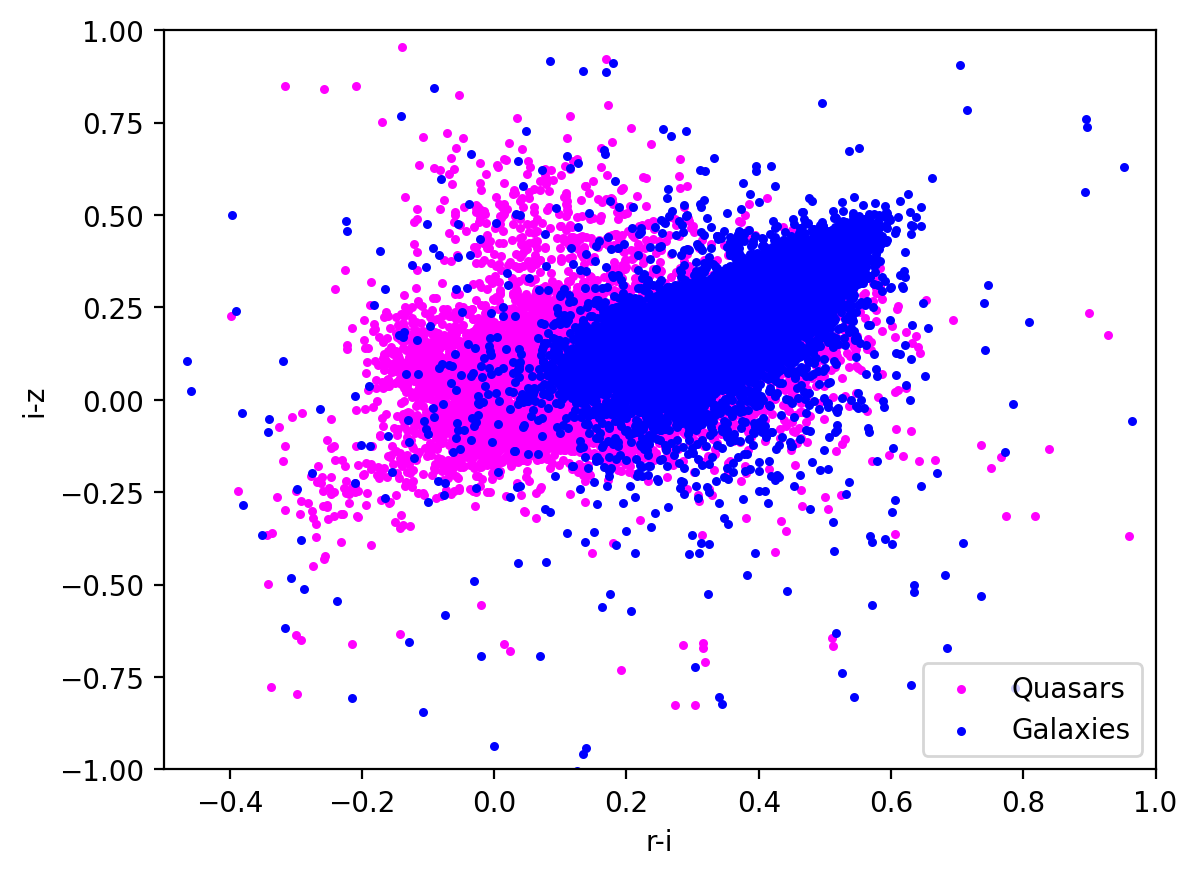

In [12]:
plt.scatter(ri[quasar_idxs],iz[quasar_idxs],color='magenta',s=5,label='Quasars')
plt.scatter(ri[gal_idxs],iz[gal_idxs],color='blue',s=5,label='Galaxies')

plt.xlim(-0.5,1.0)
plt.ylim(-1.0,1.0)
plt.xlabel('r-i')
plt.ylabel('i-z')
plt.legend()
plt.show()

3. Stack the $(r-i)$ and $(i-z)$ colors into a data matrix, $X$. Create a target label array that has $0$ for a regular galaxy and $1$ for a quasar. Perform a train-test split, taking $20\%$ of the data for testing. Set the `random_state` in your train-test split to be `42` for reproducibility (and easy comparison with my solutions).

In [14]:
# stack data
X = np.vstack([ri,iz])
print(X.shape)
X=X.T
print(X.shape)

# targel labels
target_labels = np.empty(shape=ri.shape)
target_labels[gal_idxs] = 0
target_labels[quasar_idxs] = 1
print(target_labels.shape)

(2, 50000)
(50000, 2)
(50000,)


In [15]:
# split 20 percent for testing 
from sklearn.model_selection import train_test_split

X_train, X_test, targ_train, targ_test = train_test_split(X, target_labels,test_size=0.2,random_state=42)
print(X_train.shape)
print(X_test.shape)
print(targ_train.shape)
print(targ_test.shape)

(40000, 2)
(10000, 2)
(40000,)
(10000,)


4. Scale your training and testing data to prepare it for the DNN. 

In [16]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

Xtrain_scaled = scaler.fit_transform(X_train)
Xtest_scaled = scaler.fit_transform(X_test)
print(Xtrain_scaled.shape)
print(Xtest_scaled.shape)

(40000, 2)
(10000, 2)



5. Train scikit-learn's multi-layer perceptron classifier with ReLU activation, stochastic gradient descent, two hidden layers of respective sizes of $5$ and $2$, and using `max_iter=1000`, and `random_state=42`. As with classifiers in last week's homework, plot an ROC curve that shows the network's performance on the scaled testing data. 

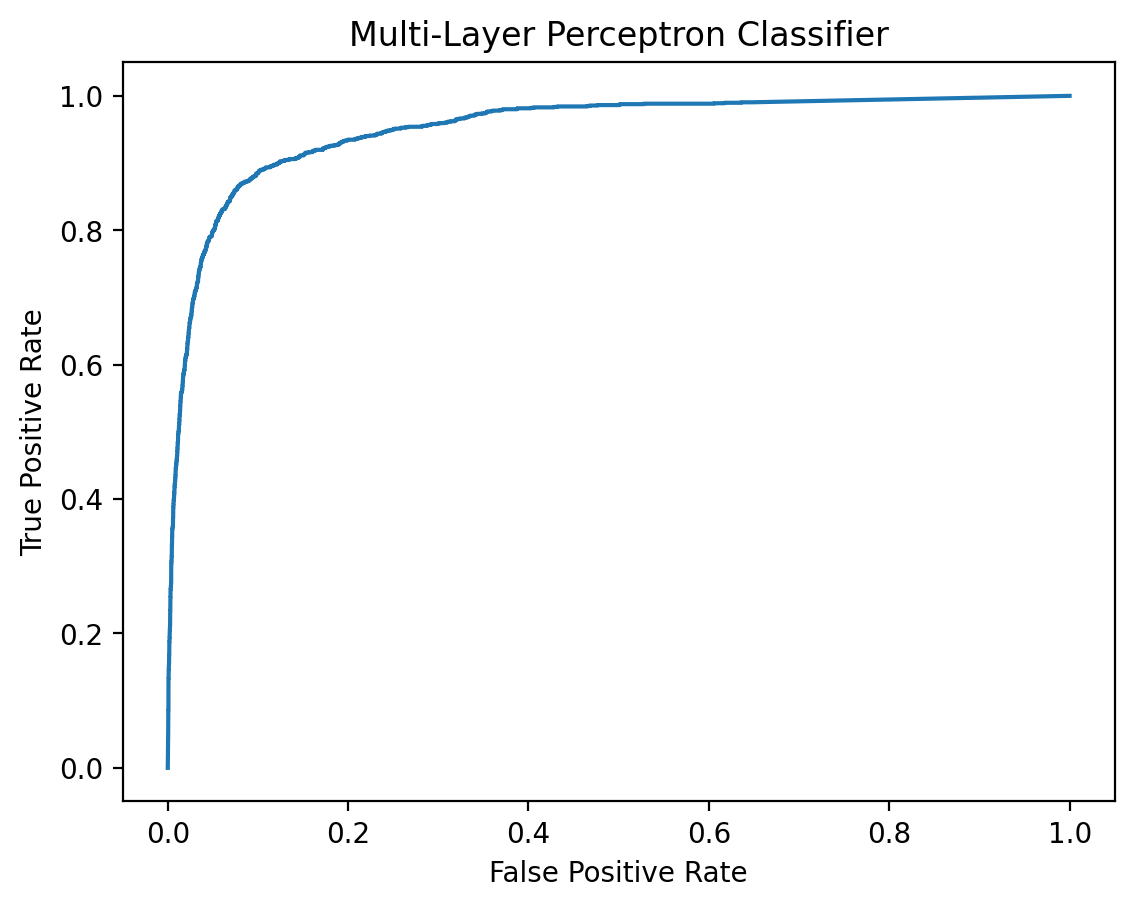

In [20]:
from sklearn.neural_network import MLPClassifier
from sklearn import metrics

clf = MLPClassifier(solver='sgd', 
                   hidden_layer_sizes=(5,2), 
                   random_state=42, 
                   max_iter=1000,
                   activation='relu')

clf.fit(Xtrain_scaled, targ_train)
ypred = clf.predict_proba(Xtest_scaled)[:,1] # index 1 is for quasar

# get ROC curve and plot
fpr, tpr, thresh = metrics.roc_curve(targ_test, ypred)
plt.plot(fpr,tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multi-Layer Perceptron Classifier')
plt.show()


6. Now let's optimize the hyperparameters of your network. You will use `GridSearchCV` with the following hyperparameters for the network:

```
parameters = {'solver': ['lbfgs', 'sgd', 'adam'], 
              'hidden_layer_sizes': [(2,2), (5,5), (5,2), (5,5,5)], 
              'activation': ['relu', 'tanh'], 
              'random_state': [42], 'max_iter': [1000]}
```

Remember that you can utilize all availables cores on your machine with `n_jobs=-1`. Print out the classification score for the training data, and the best parameters obtained by the cross validation.

In [21]:
from sklearn.model_selection import GridSearchCV

parameters = {'solver': ['lbfgs', 'sgd', 'adam'], 
              'hidden_layer_sizes': [(2,2), (5,5), (5,2), (5,5,5)], 
              'activation': ['relu', 'tanh'], 
              'random_state': [42], 'max_iter': [1000]}

grid = GridSearchCV(MLPClassifier(),
                    param_grid=parameters,
                    n_jobs=-1)
grid.fit(Xtrain_scaled,targ_train)

print(grid.best_params_)
print(grid.best_score_)

/home/rothj1/anaconda3/envs/astr8070/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/rothj1/anaconda3/envs/astr8070/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/rothj1/anaconda3/envs/astr8070/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to 

{'activation': 'tanh', 'hidden_layer_sizes': (5, 5, 5), 'max_iter': 1000, 'random_state': 42, 'solver': 'adam'}
0.936075


7. Fit a new DNN using the best hyperparameters obtained in (6), and make a plot that has ROC curves for this new network and your original network. Let the x and y axes have the full limit range of 0 to 1. Voila!

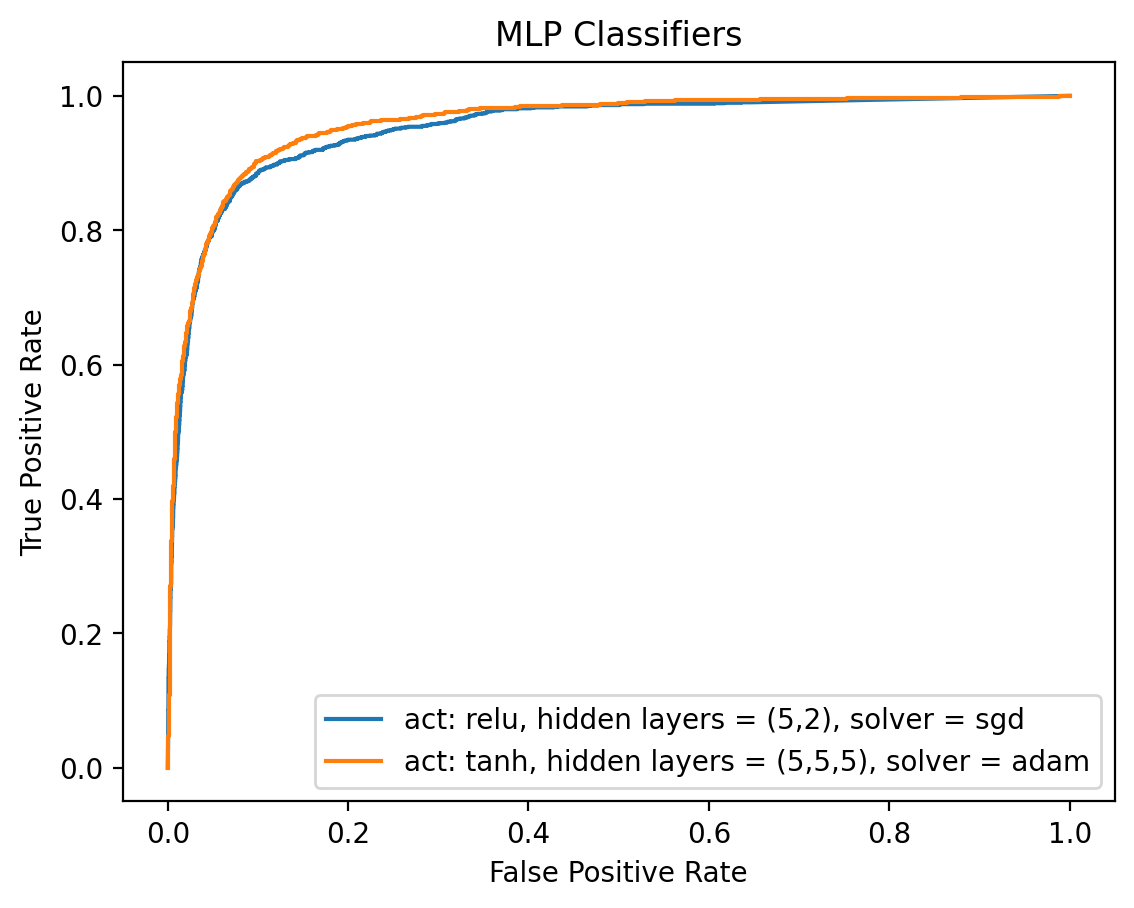

In [25]:
clf1 = MLPClassifier(solver='sgd', 
                   hidden_layer_sizes=(5,2), 
                   random_state=42, 
                   max_iter=1000,
                   activation='relu')

clf2 = MLPClassifier(solver='adam', 
                   hidden_layer_sizes=(5,5,5), 
                   random_state=42, 
                   max_iter=1000,
                   activation='tanh')

clf1.fit(Xtrain_scaled, targ_train)
ypred1 = clf1.predict_proba(Xtest_scaled)[:,1]
clf2.fit(Xtrain_scaled, targ_train)
ypred2 = clf2.predict_proba(Xtest_scaled)[:,1]

# get ROC curve and plot
fpr1, tpr1, thresh1 = metrics.roc_curve(targ_test, ypred1)
fpr2, tpr2, thresh2 = metrics.roc_curve(targ_test, ypred2) # with best params

plt.plot(fpr1,tpr1,label='act: relu, hidden layers = (5,2), solver = sgd')
plt.plot(fpr2,tpr2,label='act: tanh, hidden layers = (5,5,5), solver = adam')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('MLP Classifiers')
plt.legend()
plt.show()

The optimized classifier looks just a bit better, but we should double check with areas under the curve.

In [28]:
area1 = np.trapz(y=tpr1,x=fpr1)
area2 = np.trapz(y=tpr2,x=fpr2)
if area2 > area1:
    print('Optimized clf wins!')

Optimized clf wins!
